In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [26]:
Xpath = 'Data/X/'
weather_df = pd.read_csv(Xpath + "hourly_weather_newark.csv")
weather_df["Date"] = pd.to_datetime(weather_df["Date"])
weather_df["Date"] = weather_df["Date"].dt.round('h')
weather_df

,Date,Temperature (F),Dew Point (F),Humidity (%),Wind,Wind Speed (mph),Wind Gust (mph),Pressure (in),Precipitation (in),Condition
0,2019-01-01 02:00:00,46.0,46.0,100.0,CALM,0.0,0.0,29.73,0.1,Light Rain
1,2019-01-01 03:00:00,47.0,46.0,97.0,CALM,0.0,0.0,29.67,0.0,Light Rain
2,2019-01-01 04:00:00,46.0,46.0,100.0,SW,3.0,0.0,29.62,0.0,Fog
3,2019-01-01 04:00:00,47.0,47.0,100.0,WSW,5.0,0.0,29.62,0.0,Fog
4,2019-01-01 04:00:00,47.0,47.0,100.0,W,6.0,0.0,29.63,0.0,Light Rain
...,...,...,...,...,...,...,...,...,...,...
59707,2024-12-31 23:00:00,46.0,43.0,89.0,NE,13.0,0.0,29.55,0.4,T-Storm
59708,2024-12-31 23:00:00,46.0,43.0,89.0,NE,10.0,22.0,29.53,0.1,Light Rain with Thunder
59709,2025-01-01 00:00:00,46.0,43.0,89.0,NE,13.0,0.0,29.49,0.1,Light Rain
59710,2024-12-31 00:00:00,47.0,44.0,90.0,N,5.0,0.0,29.49,0.0,Cloudy


In [27]:
import os

Ypath = "Data/Y/"

files = os.listdir(Ypath)

rate_classes = {}

for file in files:
    df = pd.read_csv(Ypath + file)
    name = file.removesuffix("_cleaned.csv")

    rate_classes[name] = df
    
    df.rename(columns={name: "Load"}, inplace=True)
    df["Load"] = df["Load"] / 1000 # make sure all load units are in megawatts, MW = KW/1000
    df["Date"] = pd.to_datetime(df["Date"])

    """
    fig, ax = plt.subplots(figsize=(10, 4)) # width and height in inches
    ax.set_title(f'{name} Rate Class')
    ax.set(xlabel='Date', ylabel='Load (MWh)')

    sns.lineplot(
         data = df,
         x="Date", y="Load",
         ax=ax
    )
    sns.despine()
    """

                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2019-01-01 01:00:00  1.528514             40.0           25.0   
1     2019-01-01 02:00:00  1.426460             46.0           46.0   
2     2019-01-01 03:00:00  1.360703             47.0           46.0   
3     2019-01-01 04:00:00  1.340555             46.0           46.0   
4     2019-01-01 04:00:00  1.340555             47.0           47.0   
...                   ...       ...              ...            ...   
59707 2024-12-31 23:00:00  1.731281             46.0           42.0   
59708 2024-12-31 23:00:00  1.731281             46.0           42.0   
59709 2024-12-31 23:00:00  1.731281             46.0           43.0   
59710 2024-12-31 23:00:00  1.731281             46.0           43.0   
59711 2025-01-01 00:00:00  1.617796             46.0           43.0   

       Humidity (%)  Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              55.0   NNW               8.0              0.0        

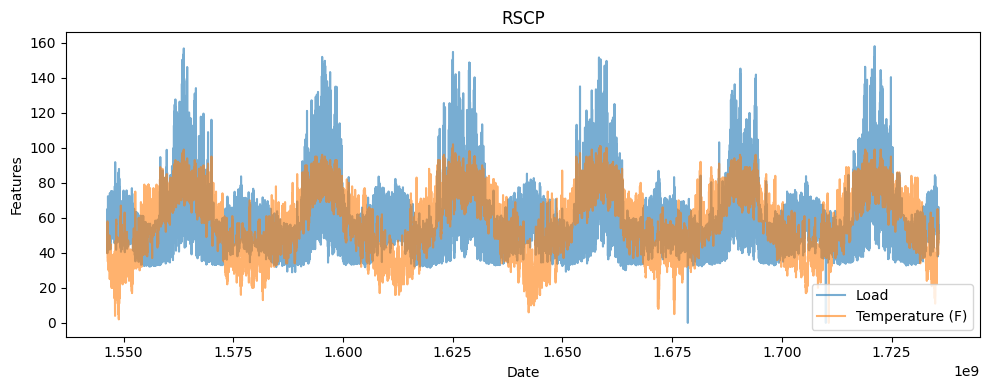

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 40.0          55.0             1600.0   
1                 46.0         100.0             2116.0   
2                 47.0          97.0             2209.0   
3                 46.0         100.0             2116.0   
4                 47.0         100.0             2209.0   
...                ...           ...                ...   
59707             46.0          86.0             2116.0   
59708             46.0          86.0             2116.0   
59709             46.0          89.0             2116.0   
59710             46.0          89.0             2116.0   
59711             46.0          89.0             2116.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2200.0          3025.0            64000.0   
1                            4600.0         10000.0            97336.0   
2                            4559.0          9409.0           103823.

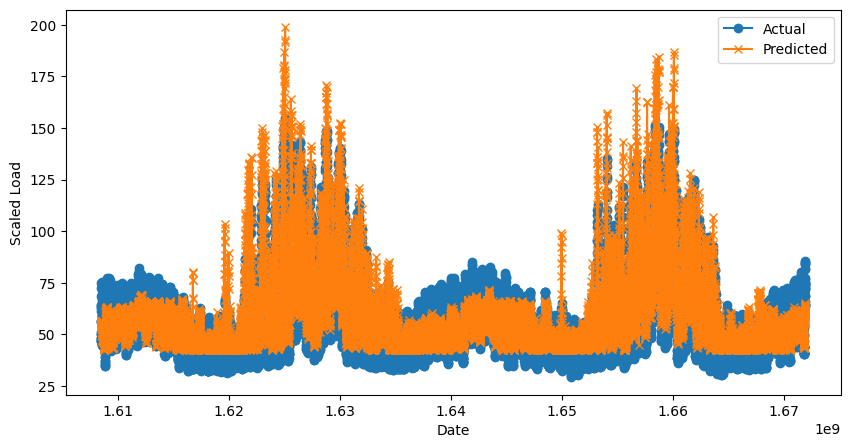

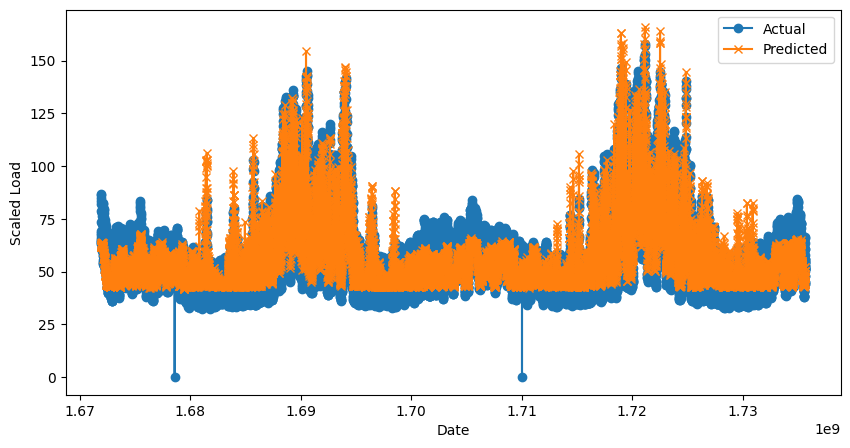

91.26254212594742
                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2020-05-31 23:00:00  0.091503             59.0           31.0   
1     2020-06-01 00:00:00  0.090328             57.0           32.0   
2     2020-06-01 01:00:00  0.089834             56.0           32.0   
3     2020-06-01 02:00:00  0.090397             55.0           32.0   
4     2020-06-01 03:00:00  0.092335             54.0           32.0   
...                   ...       ...              ...            ...   
39724 2024-05-31 18:00:00  0.079032             79.0           38.0   
39725 2024-05-31 19:00:00  0.076717             77.0           38.0   
39726 2024-05-31 20:00:00  0.071584             75.0           40.0   
39727 2024-05-31 21:00:00  0.066589             74.0           41.0   
39728 2024-05-31 22:00:00  0.063681             72.0           39.0   

       Humidity (%) Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              35.0  NNW              14.0         

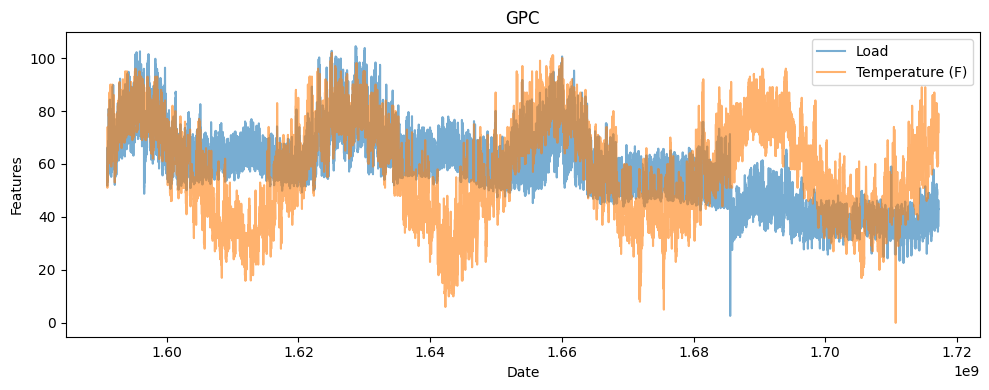

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 59.0          35.0             3481.0   
1                 57.0          39.0             3249.0   
2                 56.0          40.0             3136.0   
3                 55.0          42.0             3025.0   
4                 54.0          43.0             2916.0   
...                ...           ...                ...   
39724             79.0          23.0             6241.0   
39725             77.0          24.0             5929.0   
39726             75.0          28.0             5625.0   
39727             74.0          30.0             5476.0   
39728             72.0          30.0             5184.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2065.0          1225.0           205379.0   
1                            2223.0          1521.0           185193.0   
2                            2240.0          1600.0           175616.

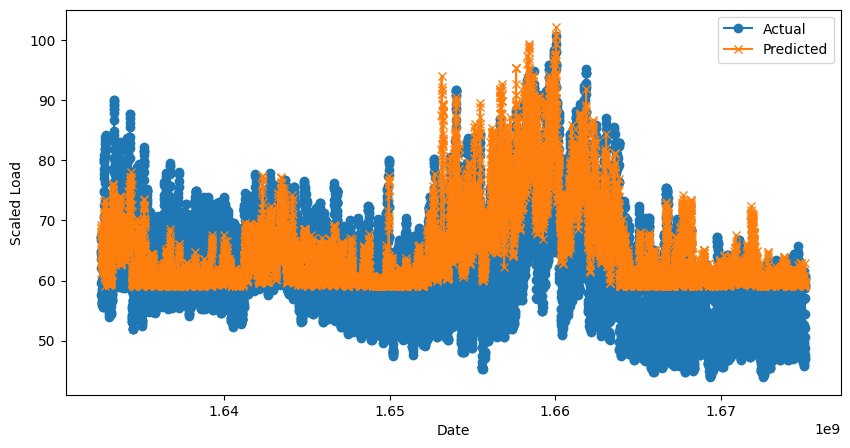

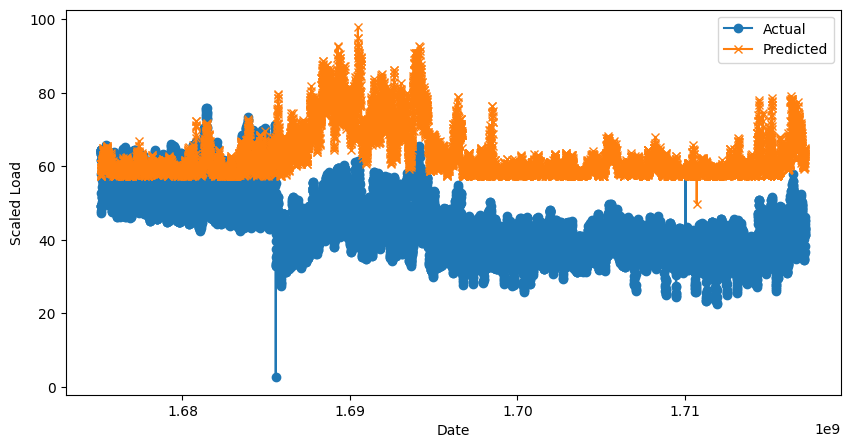

274.81701434464935
                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2020-05-31 23:00:00  0.055233             59.0           31.0   
1     2020-06-01 00:00:00  0.055415             57.0           32.0   
2     2020-06-01 01:00:00  0.055936             56.0           32.0   
3     2020-06-01 02:00:00  0.056485             55.0           32.0   
4     2020-06-01 03:00:00  0.058028             54.0           32.0   
...                   ...       ...              ...            ...   
39724 2024-05-31 18:00:00  0.039139             79.0           38.0   
39725 2024-05-31 19:00:00  0.037657             77.0           38.0   
39726 2024-05-31 20:00:00  0.036259             75.0           40.0   
39727 2024-05-31 21:00:00  0.035454             74.0           41.0   
39728 2024-05-31 22:00:00  0.034422             72.0           39.0   

       Humidity (%) Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              35.0  NNW              14.0        

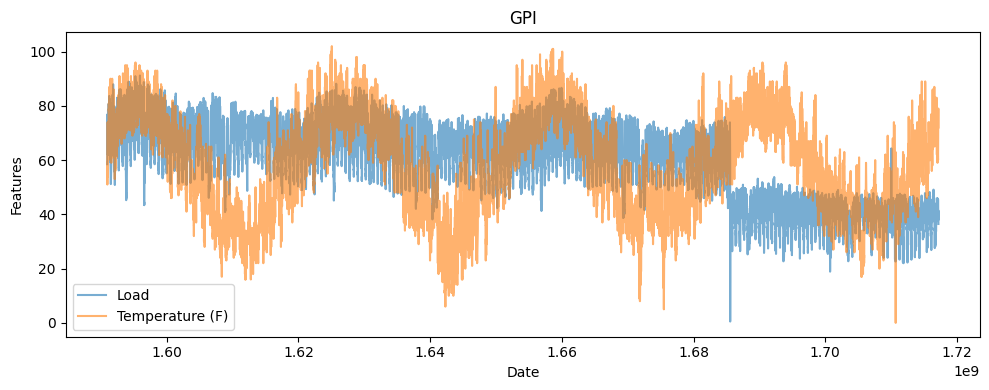

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 59.0          35.0             3481.0   
1                 57.0          39.0             3249.0   
2                 56.0          40.0             3136.0   
3                 55.0          42.0             3025.0   
4                 54.0          43.0             2916.0   
...                ...           ...                ...   
39724             79.0          23.0             6241.0   
39725             77.0          24.0             5929.0   
39726             75.0          28.0             5625.0   
39727             74.0          30.0             5476.0   
39728             72.0          30.0             5184.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2065.0          1225.0           205379.0   
1                            2223.0          1521.0           185193.0   
2                            2240.0          1600.0           175616.

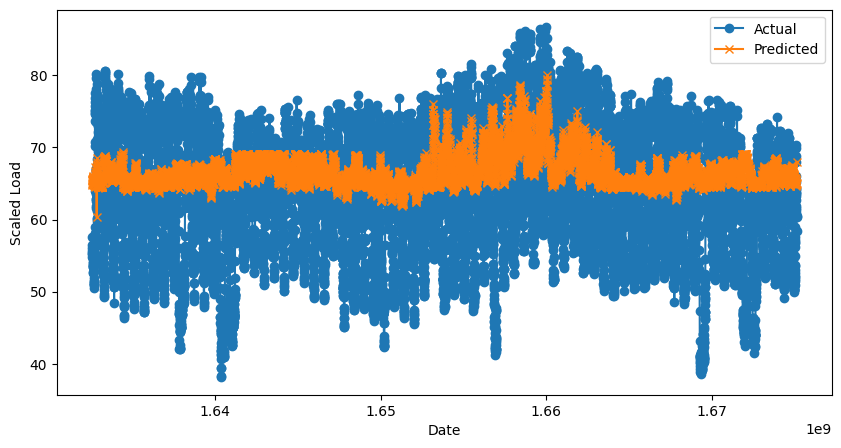

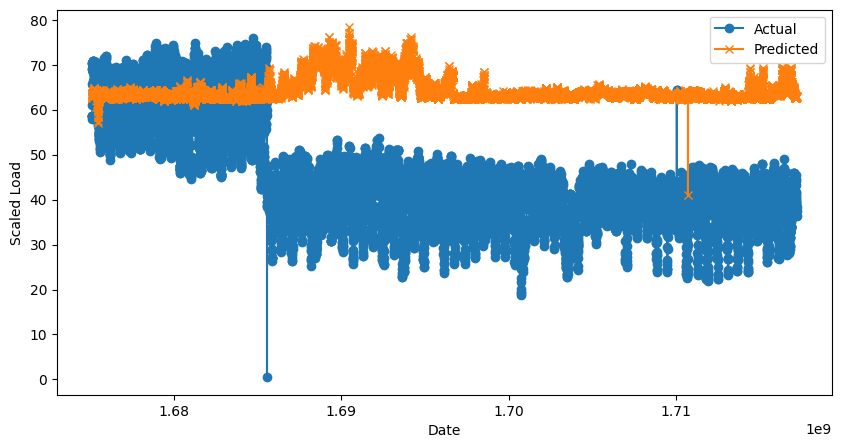

323.7936735093563
                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2020-05-31 23:00:00  0.519974             59.0           31.0   
1     2020-06-01 00:00:00  0.434185             57.0           32.0   
2     2020-06-01 01:00:00  0.417493             56.0           32.0   
3     2020-06-01 02:00:00  0.417473             55.0           32.0   
4     2020-06-01 03:00:00  0.468541             54.0           32.0   
...                   ...       ...              ...            ...   
39724 2024-05-31 18:00:00  0.878167             79.0           38.0   
39725 2024-05-31 19:00:00  1.031416             77.0           38.0   
39726 2024-05-31 20:00:00  0.974285             75.0           40.0   
39727 2024-05-31 21:00:00  0.871071             74.0           41.0   
39728 2024-05-31 22:00:00  0.785638             72.0           39.0   

       Humidity (%) Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              35.0  NNW              14.0         

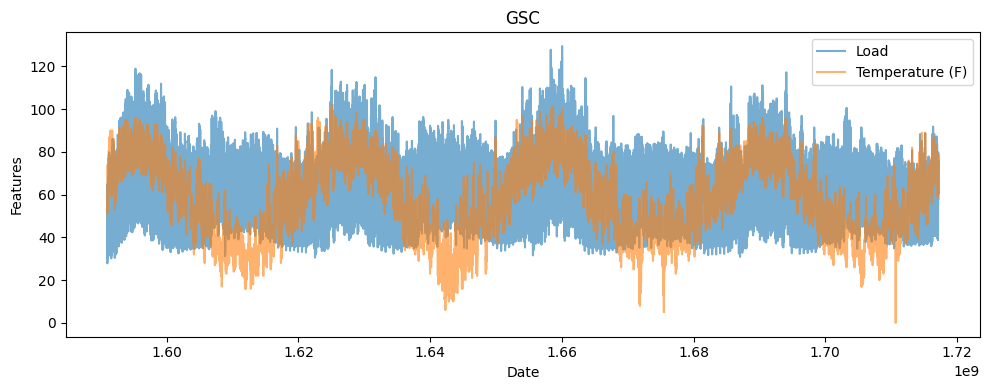

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 59.0          35.0             3481.0   
1                 57.0          39.0             3249.0   
2                 56.0          40.0             3136.0   
3                 55.0          42.0             3025.0   
4                 54.0          43.0             2916.0   
...                ...           ...                ...   
39724             79.0          23.0             6241.0   
39725             77.0          24.0             5929.0   
39726             75.0          28.0             5625.0   
39727             74.0          30.0             5476.0   
39728             72.0          30.0             5184.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2065.0          1225.0           205379.0   
1                            2223.0          1521.0           185193.0   
2                            2240.0          1600.0           175616.

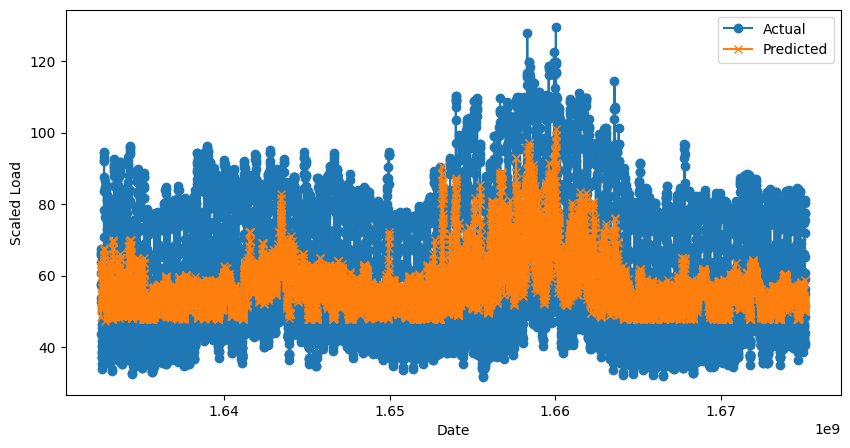

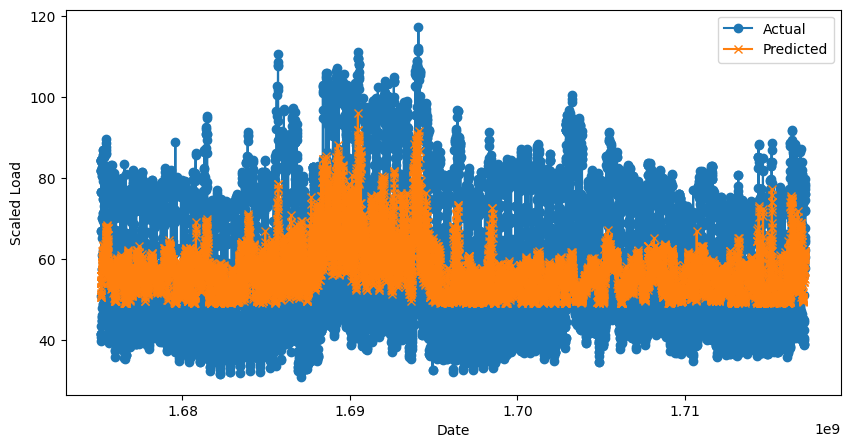

246.01768398596113
                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2020-05-31 23:00:00  0.035287             59.0           31.0   
1     2020-06-01 00:00:00  0.038004             57.0           32.0   
2     2020-06-01 01:00:00  0.036595             56.0           32.0   
3     2020-06-01 02:00:00  0.035598             55.0           32.0   
4     2020-06-01 03:00:00  0.035193             54.0           32.0   
...                   ...       ...              ...            ...   
39724 2024-05-31 18:00:00  0.048426             79.0           38.0   
39725 2024-05-31 19:00:00  0.050570             77.0           38.0   
39726 2024-05-31 20:00:00  0.049554             75.0           40.0   
39727 2024-05-31 21:00:00  0.046387             74.0           41.0   
39728 2024-05-31 22:00:00  0.044552             72.0           39.0   

       Humidity (%) Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              35.0  NNW              14.0        

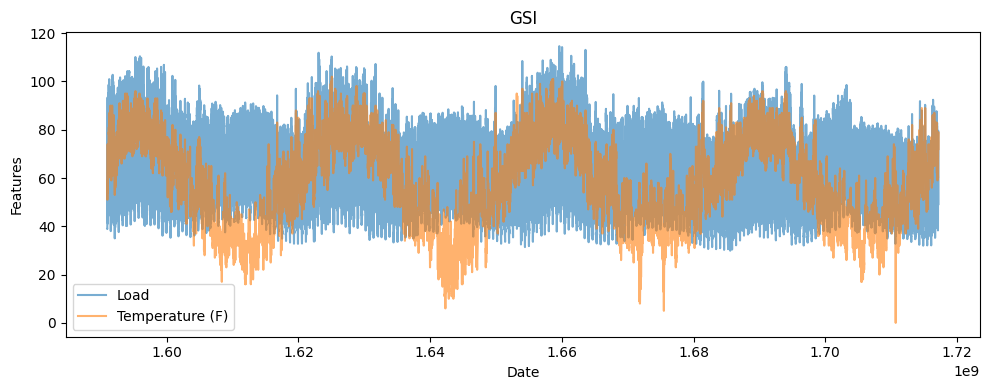

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 59.0          35.0             3481.0   
1                 57.0          39.0             3249.0   
2                 56.0          40.0             3136.0   
3                 55.0          42.0             3025.0   
4                 54.0          43.0             2916.0   
...                ...           ...                ...   
39724             79.0          23.0             6241.0   
39725             77.0          24.0             5929.0   
39726             75.0          28.0             5625.0   
39727             74.0          30.0             5476.0   
39728             72.0          30.0             5184.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2065.0          1225.0           205379.0   
1                            2223.0          1521.0           185193.0   
2                            2240.0          1600.0           175616.

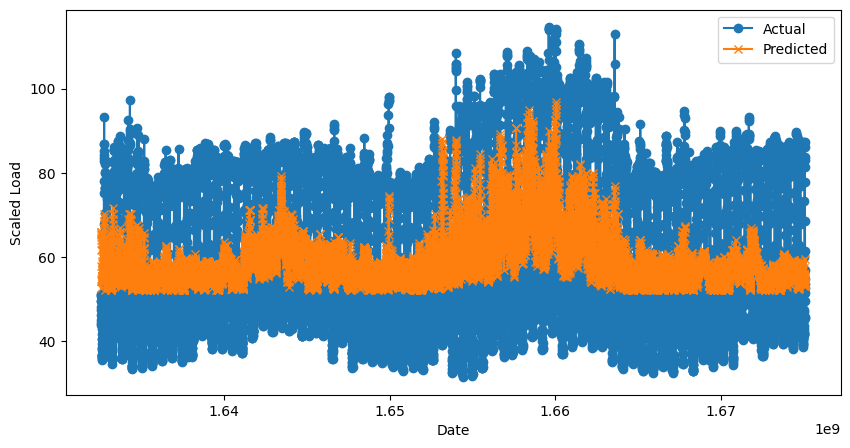

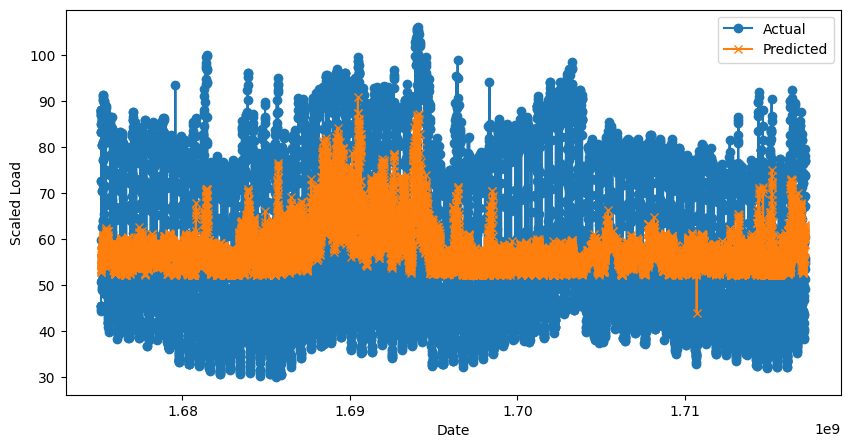

277.90328455641867
                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2020-05-31 23:00:00  0.035260             59.0           31.0   
1     2020-06-01 00:00:00  0.035366             57.0           32.0   
2     2020-06-01 01:00:00  0.035369             56.0           32.0   
3     2020-06-01 02:00:00  0.035823             55.0           32.0   
4     2020-06-01 03:00:00  0.038767             54.0           32.0   
...                   ...       ...              ...            ...   
39724 2024-05-31 18:00:00  0.043900             79.0           38.0   
39725 2024-05-31 19:00:00  0.041612             77.0           38.0   
39726 2024-05-31 20:00:00  0.037262             75.0           40.0   
39727 2024-05-31 21:00:00  0.033450             74.0           41.0   
39728 2024-05-31 22:00:00  0.031636             72.0           39.0   

       Humidity (%) Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              35.0  NNW              14.0        

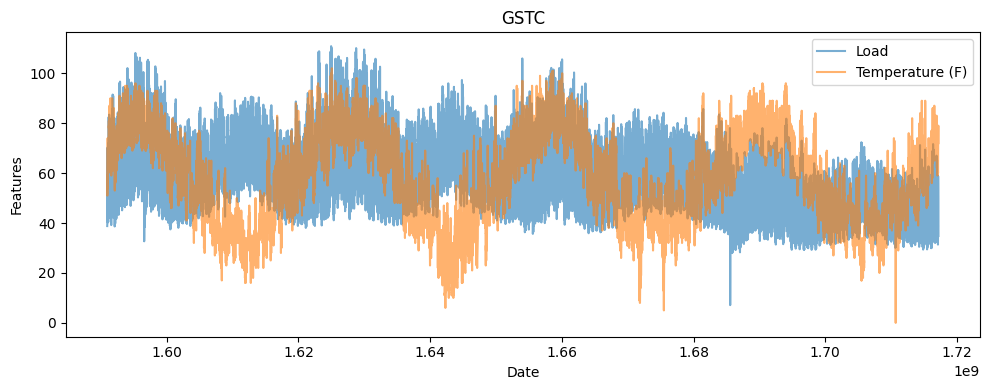

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 59.0          35.0             3481.0   
1                 57.0          39.0             3249.0   
2                 56.0          40.0             3136.0   
3                 55.0          42.0             3025.0   
4                 54.0          43.0             2916.0   
...                ...           ...                ...   
39724             79.0          23.0             6241.0   
39725             77.0          24.0             5929.0   
39726             75.0          28.0             5625.0   
39727             74.0          30.0             5476.0   
39728             72.0          30.0             5184.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2065.0          1225.0           205379.0   
1                            2223.0          1521.0           185193.0   
2                            2240.0          1600.0           175616.

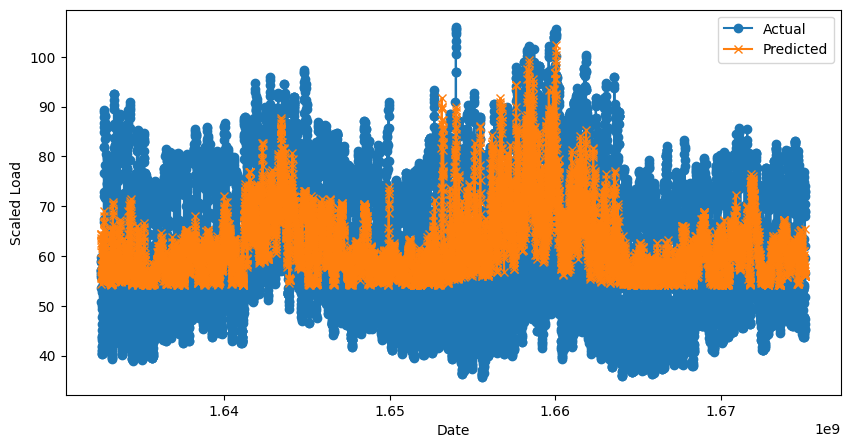

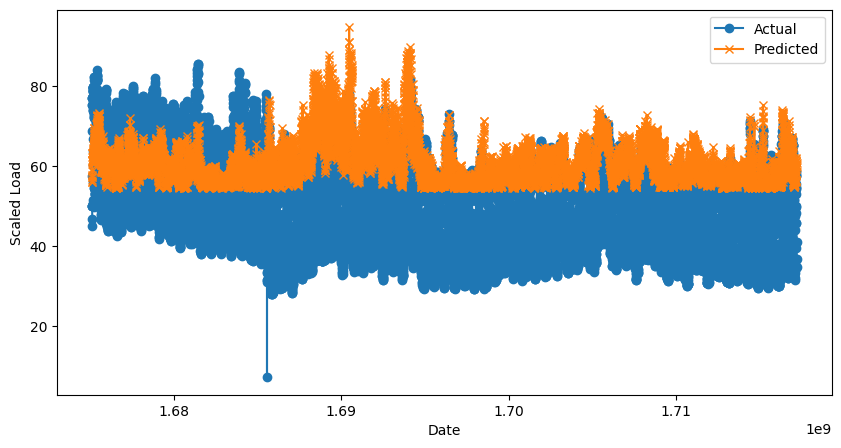

233.96787609906266
                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2020-05-31 23:00:00  0.009287             59.0           31.0   
1     2020-06-01 00:00:00  0.009329             57.0           32.0   
2     2020-06-01 01:00:00  0.009232             56.0           32.0   
3     2020-06-01 02:00:00  0.009182             55.0           32.0   
4     2020-06-01 03:00:00  0.009324             54.0           32.0   
...                   ...       ...              ...            ...   
39724 2024-05-31 18:00:00  0.007682             79.0           38.0   
39725 2024-05-31 19:00:00  0.007409             77.0           38.0   
39726 2024-05-31 20:00:00  0.007077             75.0           40.0   
39727 2024-05-31 21:00:00  0.006873             74.0           41.0   
39728 2024-05-31 22:00:00  0.006561             72.0           39.0   

       Humidity (%) Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              35.0  NNW              14.0        

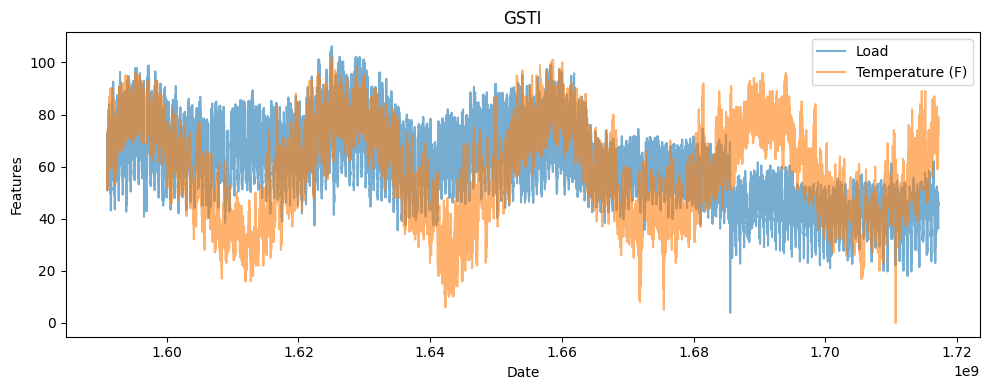

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 59.0          35.0             3481.0   
1                 57.0          39.0             3249.0   
2                 56.0          40.0             3136.0   
3                 55.0          42.0             3025.0   
4                 54.0          43.0             2916.0   
...                ...           ...                ...   
39724             79.0          23.0             6241.0   
39725             77.0          24.0             5929.0   
39726             75.0          28.0             5625.0   
39727             74.0          30.0             5476.0   
39728             72.0          30.0             5184.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2065.0          1225.0           205379.0   
1                            2223.0          1521.0           185193.0   
2                            2240.0          1600.0           175616.

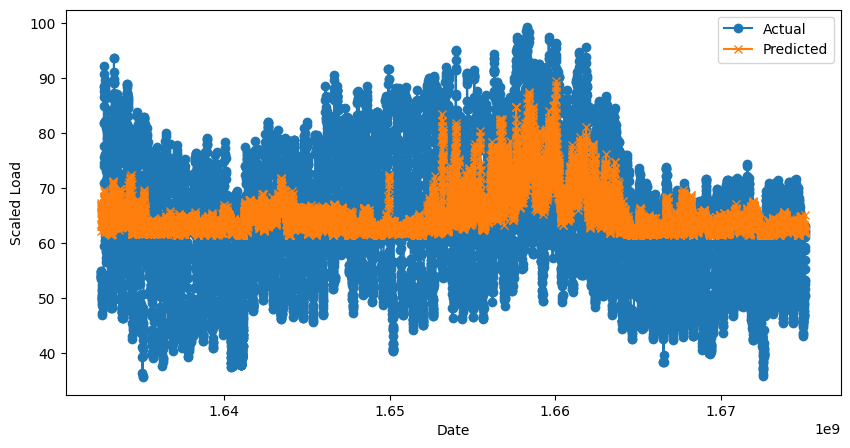

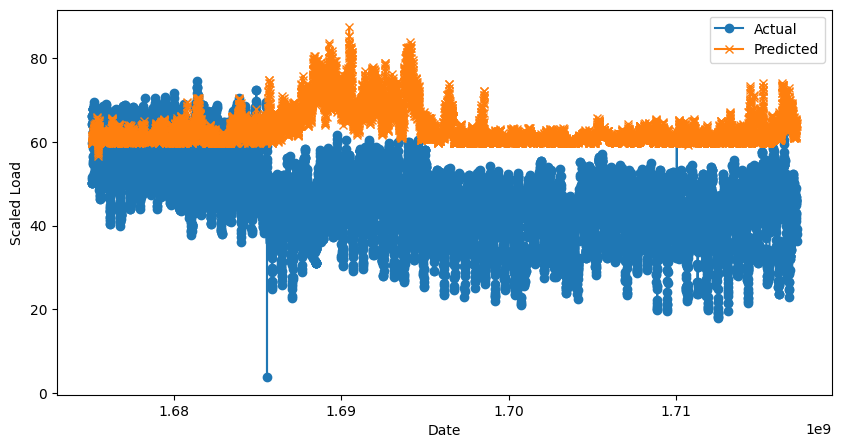

286.7782769245655
                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2020-05-31 23:00:00  0.072541             59.0           31.0   
1     2020-06-01 00:00:00  0.072681             57.0           32.0   
2     2020-06-01 01:00:00  0.072883             56.0           32.0   
3     2020-06-01 02:00:00  0.073792             55.0           32.0   
4     2020-06-01 03:00:00  0.074173             54.0           32.0   
...                   ...       ...              ...            ...   
39724 2024-05-31 18:00:00  0.066825             79.0           38.0   
39725 2024-05-31 19:00:00  0.065300             77.0           38.0   
39726 2024-05-31 20:00:00  0.065377             75.0           40.0   
39727 2024-05-31 21:00:00  0.064010             74.0           41.0   
39728 2024-05-31 22:00:00  0.064035             72.0           39.0   

       Humidity (%) Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              35.0  NNW              14.0         

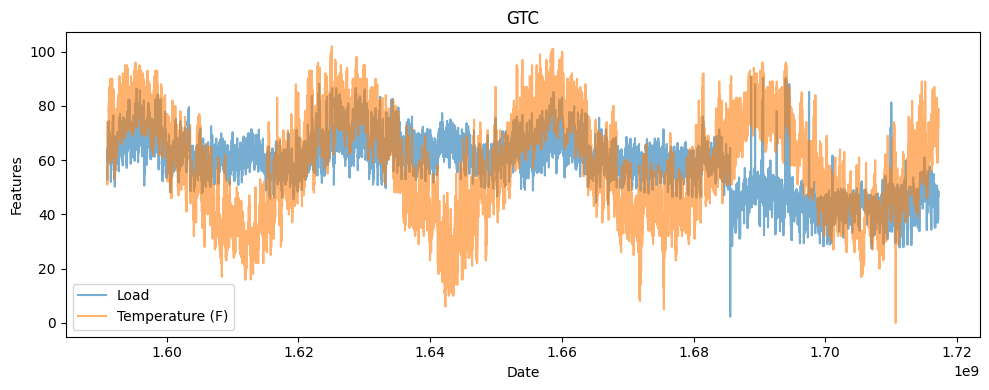

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 59.0          35.0             3481.0   
1                 57.0          39.0             3249.0   
2                 56.0          40.0             3136.0   
3                 55.0          42.0             3025.0   
4                 54.0          43.0             2916.0   
...                ...           ...                ...   
39724             79.0          23.0             6241.0   
39725             77.0          24.0             5929.0   
39726             75.0          28.0             5625.0   
39727             74.0          30.0             5476.0   
39728             72.0          30.0             5184.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2065.0          1225.0           205379.0   
1                            2223.0          1521.0           185193.0   
2                            2240.0          1600.0           175616.

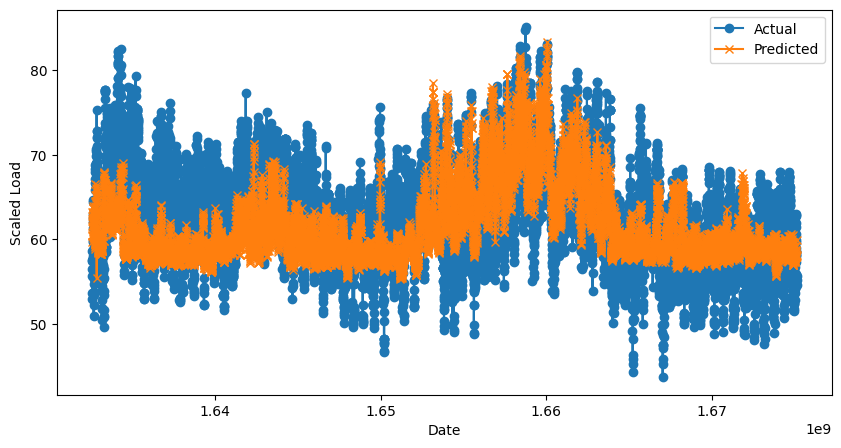

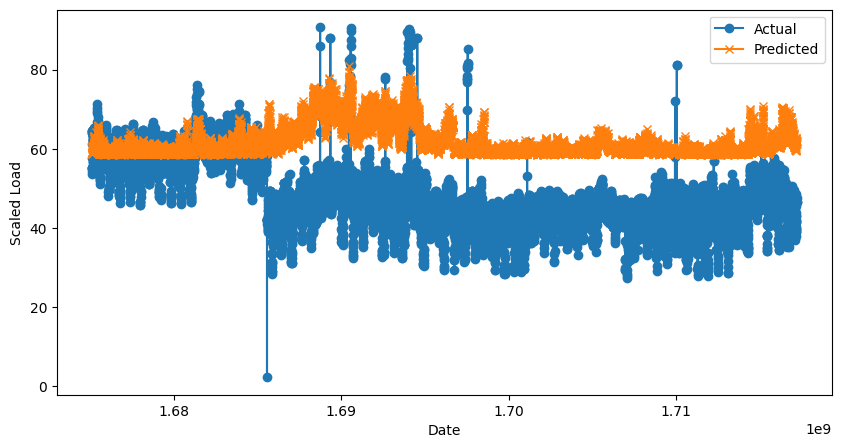

145.3827970800116
                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2020-05-31 23:00:00  0.102938             59.0           31.0   
1     2020-06-01 00:00:00  0.101593             57.0           32.0   
2     2020-06-01 01:00:00  0.101472             56.0           32.0   
3     2020-06-01 02:00:00  0.101417             55.0           32.0   
4     2020-06-01 03:00:00  0.105500             54.0           32.0   
...                   ...       ...              ...            ...   
39724 2024-05-31 18:00:00  0.111365             79.0           38.0   
39725 2024-05-31 19:00:00  0.105628             77.0           38.0   
39726 2024-05-31 20:00:00  0.107933             75.0           40.0   
39727 2024-05-31 21:00:00  0.091688             74.0           41.0   
39728 2024-05-31 22:00:00  0.113757             72.0           39.0   

       Humidity (%) Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              35.0  NNW              14.0         

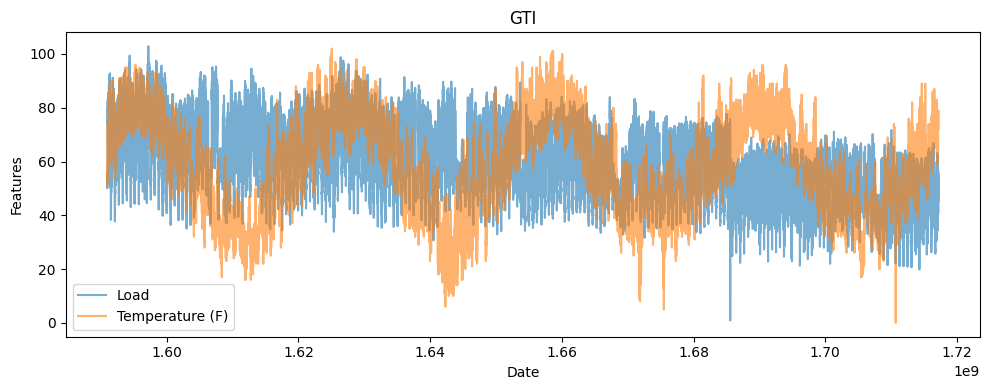

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 59.0          35.0             3481.0   
1                 57.0          39.0             3249.0   
2                 56.0          40.0             3136.0   
3                 55.0          42.0             3025.0   
4                 54.0          43.0             2916.0   
...                ...           ...                ...   
39724             79.0          23.0             6241.0   
39725             77.0          24.0             5929.0   
39726             75.0          28.0             5625.0   
39727             74.0          30.0             5476.0   
39728             72.0          30.0             5184.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2065.0          1225.0           205379.0   
1                            2223.0          1521.0           185193.0   
2                            2240.0          1600.0           175616.

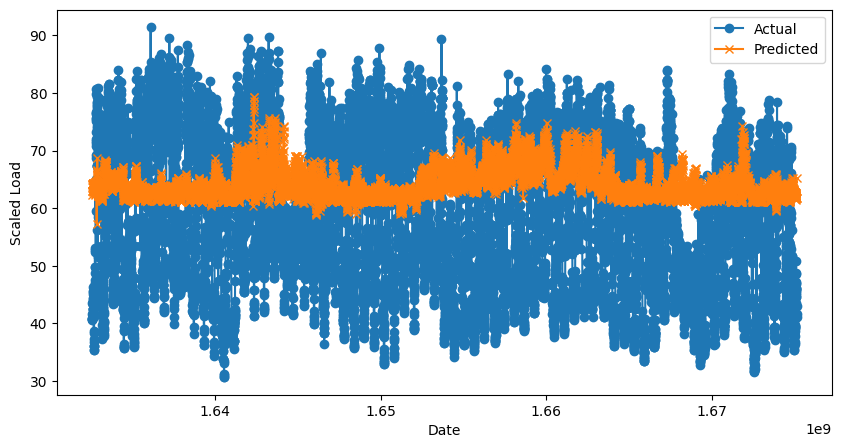

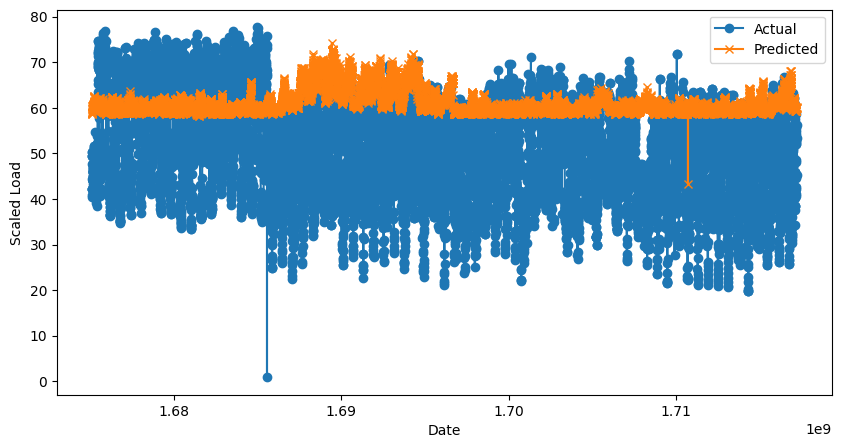

223.8829097712561
                     Date      Load  Temperature (F)  Dew Point (F)  \
0     2020-05-31 23:00:00  0.983259             59.0           31.0   
1     2020-06-01 00:00:00  0.657754             57.0           32.0   
2     2020-06-01 01:00:00  0.757302             56.0           32.0   
3     2020-06-01 02:00:00  0.693081             55.0           32.0   
4     2020-06-01 03:00:00  0.920186             54.0           32.0   
...                   ...       ...              ...            ...   
39724 2024-05-31 18:00:00  2.120606             79.0           38.0   
39725 2024-05-31 19:00:00  2.123318             77.0           38.0   
39726 2024-05-31 20:00:00  2.099053             75.0           40.0   
39727 2024-05-31 21:00:00  1.929819             74.0           41.0   
39728 2024-05-31 22:00:00  1.623983             72.0           39.0   

       Humidity (%) Wind  Wind Speed (mph)  Wind Gust (mph)  Pressure (in)  \
0              35.0  NNW              14.0         

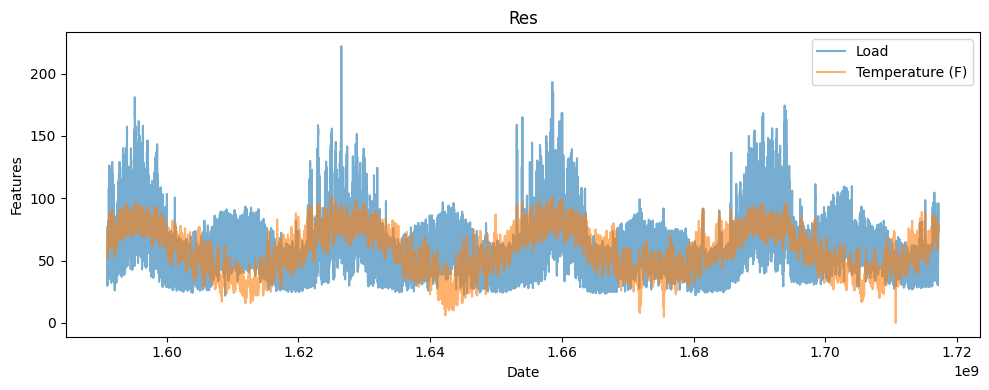

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 59.0          35.0             3481.0   
1                 57.0          39.0             3249.0   
2                 56.0          40.0             3136.0   
3                 55.0          42.0             3025.0   
4                 54.0          43.0             2916.0   
...                ...           ...                ...   
39724             79.0          23.0             6241.0   
39725             77.0          24.0             5929.0   
39726             75.0          28.0             5625.0   
39727             74.0          30.0             5476.0   
39728             72.0          30.0             5184.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2065.0          1225.0           205379.0   
1                            2223.0          1521.0           185193.0   
2                            2240.0          1600.0           175616.

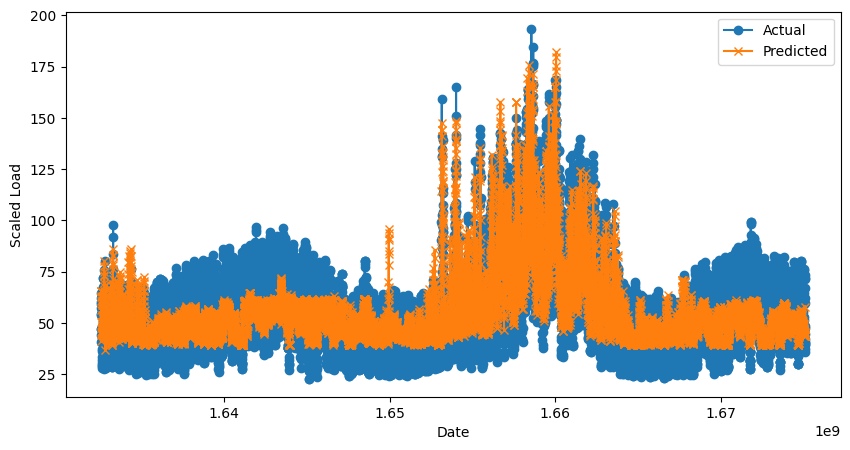

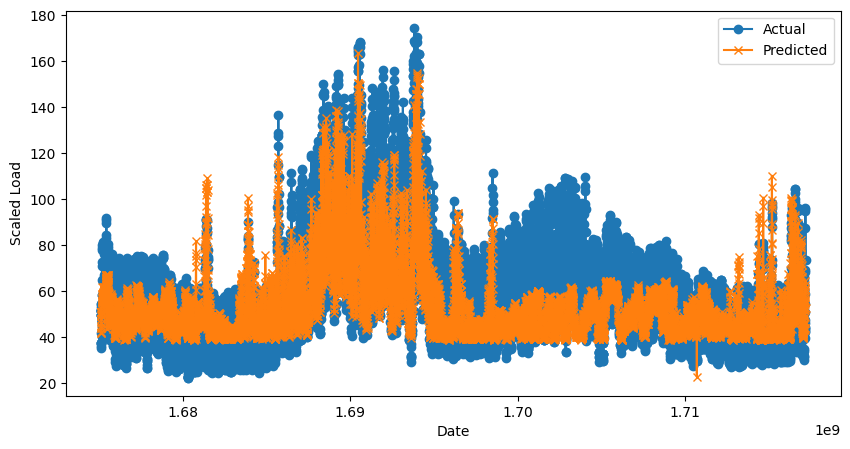

208.61143151157106


In [30]:
rateClass = ['RSCP', 'GPC', 'GPI', 'GSC', 'GSI', 'GSTC', 'GSTI', 'GTC', 'GTI', 'Res']

for rc in rateClass:
    feature_matrix = rate_classes[rc].merge(weather_df, on='Date')
    print(feature_matrix)
    # to POSIX Timestamp (number of seconds that have passed since January 1, 1970)
    #feature_matrix = feature_matrix[['Date', 'Load', 'Temperature (F)', 'Humidity (%)']]
    feature_matrix['Date'] = feature_matrix['Date'].apply(lambda t: int(t.timestamp()))

    # Scale the load so that the values are closer to the temperature values
    feature_matrix['Load'] = feature_matrix['Load'] * (feature_matrix['Temperature (F)'].mean() / feature_matrix['Load'].mean())

    fig, ax = plt.subplots(figsize=(10, 4)) # width and height in inches
    ax.set_title(f'{rc}')
    ax.set(xlabel='Date', ylabel='Features')

    ax.plot(
        feature_matrix["Date"],
        feature_matrix["Load"],
        label="Load",
        alpha=0.6
    )
    ax.plot(
        feature_matrix["Date"],
        feature_matrix["Temperature (F)"],
        label="Temperature (F)",
        alpha=0.6
    )

    ax.legend()
    plt.tight_layout()
    plt.show()

    model = LinearRegression()

    NUM_SPLITS = 2

    tscv = TimeSeriesSplit(n_splits=NUM_SPLITS)

    poly = poly = PolynomialFeatures(degree=3, include_bias=False)


    X = feature_matrix[['Temperature (F)', 'Humidity (%)']].copy()
    X = pd.DataFrame(poly.fit_transform(X), columns=poly.get_feature_names_out(X.columns))

    print(X)

    y = feature_matrix['Load']

    err = 0
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        plt.figure(figsize=(10, 5))
        plt.plot(feature_matrix['Date'].iloc[test_idx], y_test, label='Actual', marker='o')
        plt.plot(feature_matrix['Date'].iloc[test_idx], y_pred, label='Predicted', marker='x')
        plt.legend()
        plt.xlabel('Date')
        plt.ylabel('Scaled Load')
        plt.show()

        err += mean_squared_error(y_test, y_pred)

    print(err / NUM_SPLITS)

       Temperature (F)  Humidity (%)  Temperature (F)^2  \
0                 59.0          35.0             3481.0   
1                 57.0          39.0             3249.0   
2                 56.0          40.0             3136.0   
3                 55.0          42.0             3025.0   
4                 54.0          43.0             2916.0   
...                ...           ...                ...   
39724             79.0          23.0             6241.0   
39725             77.0          24.0             5929.0   
39726             75.0          28.0             5625.0   
39727             74.0          30.0             5476.0   
39728             72.0          30.0             5184.0   

       Temperature (F) Humidity (%)  Humidity (%)^2  Temperature (F)^3  \
0                            2065.0          1225.0           205379.0   
1                            2223.0          1521.0           185193.0   
2                            2240.0          1600.0           175616.

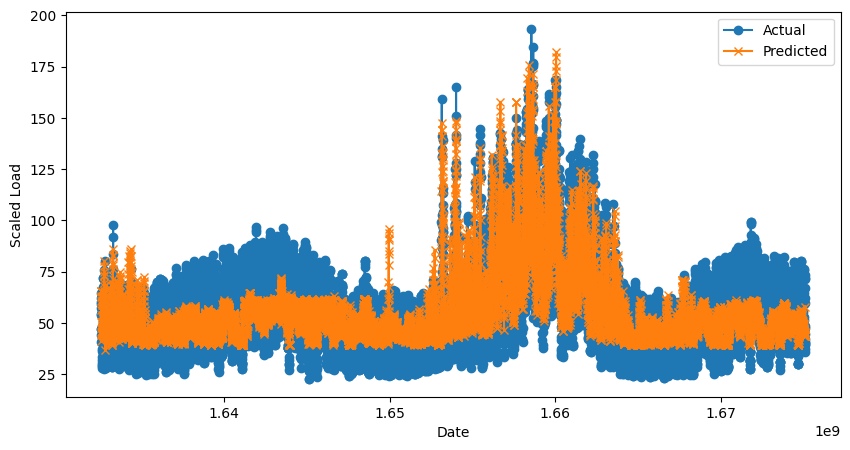

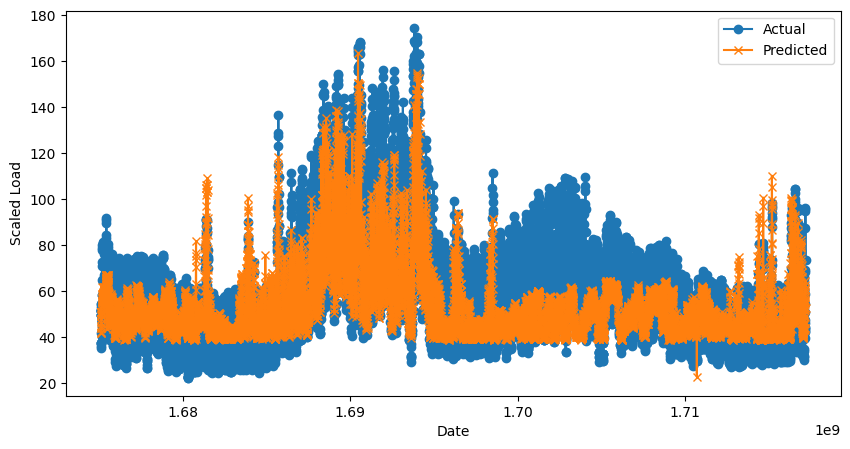

208.61143151157106


In [31]:

model = LinearRegression()

NUM_SPLITS = 2

tscv = TimeSeriesSplit(n_splits=NUM_SPLITS)

poly = poly = PolynomialFeatures(degree=3, include_bias=False)


X = feature_matrix[['Temperature (F)', 'Humidity (%)']].copy()
X = pd.DataFrame(poly.fit_transform(X), columns=poly.get_feature_names_out(X.columns))

print(X)

y = feature_matrix['Load']

err = 0
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.plot(feature_matrix['Date'].iloc[test_idx], y_test, label='Actual', marker='o')
    plt.plot(feature_matrix['Date'].iloc[test_idx], y_pred, label='Predicted', marker='x')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Scaled Load')
    plt.show()

    err += mean_squared_error(y_test, y_pred)

print(err / NUM_SPLITS)
